In [1]:
using BeamLib: IsotropicArray, steer, capon
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steer(pa, fc, Θ')*[s1; s2]
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X,2) * X*X'

# Capon spectrum 
# Same as steering capon_weights / mpdr_weights 
# but using the capon function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = capon(pa, Rxx, fc, deg2rad.(ϕaxis'))

360-element Vector{Float64}:
 0.3456772136466237
 0.3450836461963644
 0.3433055663313867
 0.3403512075573962
 0.3362354662201093
 0.3309815032653592
 0.3246226805248344
 0.3172045544089188
 0.3087866149646029
 0.2994434585803227
 ⋮
 0.3623454168805515
 0.3533391339071173
 0.34559185910032264
 0.3390902185842878
 0.33381334675885593
 0.329738440716625
 0.32684457967480235
 0.3251152665260179
 0.32454002377806035

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

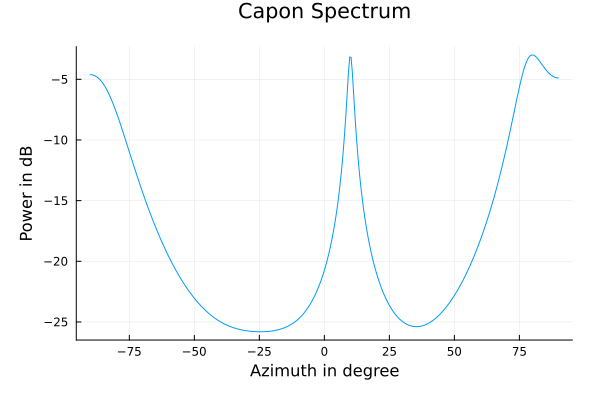

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="Capon Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")